In [1]:
%matplotlib inline
import matplotlib
matplotlib.rc("font", size=18, family="serif")
import numpy as np
import matplotlib.pyplot as plt


In [2]:
plt.rcParams['font.size']=25
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.minor.size']=5
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.width']=1
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.minor.size']=5
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=1
plt.rcParams['ytick.direction']='in'
plt.rcParams['lines.linewidth'] = 2.5
from matplotlib.ticker import MultipleLocator

In [3]:
# base    = "/home/aditiv/CGM/Pyxsim//PlotsForPaper/PlotSpectra/"

Msun = 2.e33
mp   = 1.67e-24
color = ['forestgreen', 'navy', 'darkmagenta']

ls    = [':', '-', '-.']

In [4]:

ld_lsfr = "HR_0821_1e-6_SFR3/DD0300/"
hd_hsfr = "HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/DD0130/"

folder  =[ld_lsfr, hd_hsfr]
tfile  = ["temp_cellm.txt","ln-t_cellm.txt"]
dfile  = ["dens_cellm.txt","ln-d_cellm.txt"]


In [5]:
i = 0 
base1    = "/mnt/lustre/ast2/astadit/CGM/Pyxsim/Gaussian/"
base    = "/mnt/lustre/ast2/astadit/CGM/Pyxsim/Spectra/"

temp  = np.zeros((len(folder),128))
masst = np.zeros((len(folder),128))
massd = np.zeros((len(folder),128))
dens  = np.zeros((len(folder),128))

masslnt = np.zeros((len(folder),128))
masslnd = np.zeros((len(folder),128))
templn  = np.zeros((len(folder),128))
densln  = np.zeros((len(folder),128))



for f in folder:
    temp[i]    = np.loadtxt(base  + f + tfile[0],usecols=0)
    masst[i]   = np.loadtxt(base  + f + tfile[0],usecols=1)
    templn[i]  = np.loadtxt(base1 + f + tfile[1],usecols=0)
    masslnt[i] = np.loadtxt(base1 + f + tfile[1],usecols=1)
    
    dens[i]    = np.loadtxt(base  + f + dfile[0],usecols=0)
    massd[i]   = np.loadtxt(base  + f + dfile[0],usecols=1)
    densln[i]  = np.loadtxt(base1 + f + dfile[1],usecols=0)
    masslnd[i] = np.loadtxt(base1 + f + dfile[1],usecols=1)
    i = i + 1 

In [6]:
low    = np.zeros((2,128))
index  = np.where((masst[0,:]==np.amax(masst[0,:])) ) 
index1 = np.where((temp[0,:]>1.e5) & (temp[0,:]<3.09e7))
totm = np.sum(masst[0,index1])
# # totm  = np.sum(masst[0,:])
low[0,index[0][0]]  = totm * 2. #masst[0,index[0]][0fi]*2.

index = np.where((temp[0,:]>1.e6) & (temp[0,:]<3.09e6)) 
# index1 = np.where((temp[0,:]>1.e5) & (temp[0,:]<3.09e7))
# totm = np.sum(masst[0,index1])
low[1,index[0][-1]]  = totm/2. #masst[0,index[0][-1]]/2.


# # low   = masst[index]  
# low
# temp[0,index[0][-1]]

In [7]:
high   = np.zeros((2,128))
index  = np.where((masst[1,:]==np.amax(masst[1,:])) ) 
index1 = np.where((temp[1,:]>1.e5) & (temp[1,:]<3.09e7))
totm   = np.sum(masst[1,index1])
high[0,index[0]]  = totm  #masst[1,index[0]]

index = np.where((temp[1,:]>2.85e6) & (temp[1,:]<3.09e6)) 
high[1,index[0][-1]]  = totm/1.5 # masst[1,index[0][-1]]/1.5


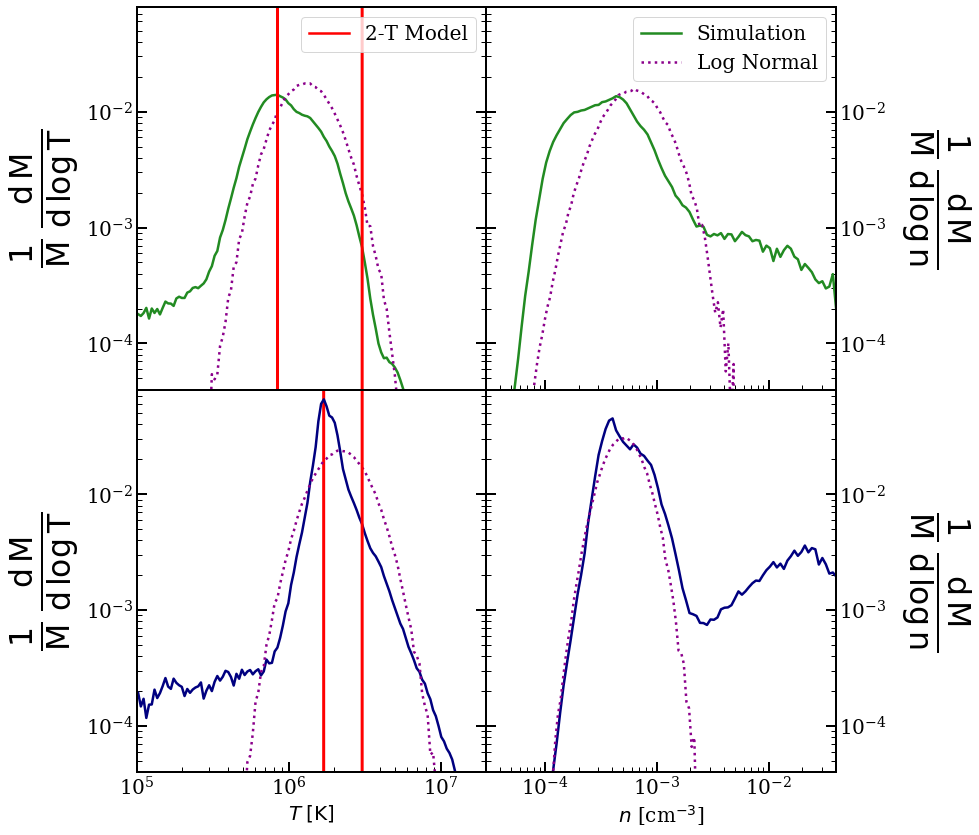

In [9]:
#Make temperature and density distribution for simulation and log-normal box
plt.rcParams['font.size']=20
plt.rcParams['axes.linewidth']=2
axis_name = ['Mass(g)', 'Density(g cm$^{-3}$)']
label = ['Simulation', 'Log Normal']
f, ax = plt.subplots(2, 2, figsize=(14,12), gridspec_kw = {'wspace':0, 'hspace':0})
for i in range(2):
    ax[i,1].plot(dens[i]/mp, massd[i]/np.sum(massd), '-', color = color[i], label = label[0])
    ax[i,1].plot(densln[i]/mp, masslnd[i]/np.sum(masslnd), ':', color = 'darkmagenta', label = label[1])
    ax[i,0].plot(temp[i],masst[i]/np.sum(masst),'-', color = color[i])
    ax[i,0].plot(templn[i],masslnt[i]/np.sum(masslnt),':', color = 'darkmagenta')
    ax[0,0].plot(temp[i],low[i]/Msun, color = 'red', label = '2-T Model')
    if(i==0): 
        ax[0,1].legend(loc='upper right')
        ax[0,0].legend(loc='upper right')
    ax[1,0].plot(temp[1],high[i]/Msun, color = 'red')

    
plt.setp(ax,'yscale','log')
plt.setp(ax,'xscale','log')
plt.setp(ax[0,0],'xticklabels', '')
# plt.setp(ax[:,1],'yticklabels', '')
plt.setp(ax, 'ylim',(4.e-5,8.e-2))
plt.setp(ax[:,0], 'xlim',(1.e5,2.e7))
plt.setp(ax[:,1], 'xlim',(3.e-5,4.e-2))
plt.subplots_adjust(wspace=None)

ax[0,0].tick_params(axis='y', which='both', right=True)
ax[0,0].tick_params(axis='x', which='both', bottom=False)

ax[0,1].tick_params(axis='y', which='both', right=True, labelright= True, labelleft=False)
ax[1,1].tick_params(axis='y', which='both', right=True)
ax[1,0].tick_params(axis='y', which='both', right=True)
ax[1,1].tick_params(axis='y', which='both', right=True, labelright= True, labelleft=False)
# ax[0].yaxis.set_major_formatter( matplotlib.ticker.FormatStrFormatter('%g'))
plt.setp(ax[1,0],'xlabel',r'$T\;[{\rm K}]$')
plt.setp(ax[1,1],'xlabel',r'$n$ [cm$^{-3}$]')


# plt.setp(ax[:,0],'ylabel',r"$\frac{\Delta log(M)}{\Delta log(T)}$")

ax[0,0].set_ylabel(r"$\frac{1}{\rm M}\,\frac{\rm d\, M}{\rm d\, log\,T}$", fontsize=45)
ax[1,0].set_ylabel(r"$\frac{1}{\rm M}\,\frac{\rm d\, M}{\rm d\, log\,T}$", fontsize=45)

# ax[0,1].set_ylabel(r"$\frac{\Delta log(M)}{\Delta log(n)}$", rotation=270, fontsize=35, labelpad=85)
ax[0,1].set_ylabel(r"$\frac{1}{\rm M}\,\frac{\rm d\, M}{\rm d\, log\,n}$", rotation=270, fontsize=45, labelpad=85)
ax[0,1].yaxis.set_label_position("right")
ax[1,1].set_ylabel(r"$\frac{1}{\rm M}\,\frac{\rm d\, M}{\rm d\, log\,n}$", rotation=270, fontsize=45, labelpad=85)
ax[1,1].yaxis.set_label_position("right")


ax[0,0].tick_params(axis='x', which='both', bottom=False)
plt.tight_layout()
plt.savefig('log-normal-td.pdf', bbox_inches='tight', dpi=160)

In [10]:

base1    = "/mnt/lustre/ast2/astadit/CGM/Pyxsim/Spectra/"
base2    = "/mnt/lustre/ast2/astadit/CGM/Pyxsim/Gaussian/"
# base    = "/mnt/lustre/ast2/astadit/CGM/Pyxsim/Spectra/"


folder  =[ld_lsfr, hd_hsfr]
sim_HR  = "sim_spec_HR.txt"
sim_LR  = "sim_spec_LR.txt"
ln_HR   = "ln_spec_HR.txt"
ln_LR   = "ln_spec_LR.txt"
import os
name = os.path.abspath(base1+folder[0]+sim_HR)
name = os.path.abspath(base1+folder[0]+sim_HR)
i       = 0

dum     = np.loadtxt(name,usecols=0)
eHR     = np.zeros((1,dum.shape[0]))
simHR   = np.zeros((len(folder),dum.shape[0]))
lnHR1   = np.zeros((len(folder),dum.shape[0]))



dum     = np.loadtxt(base1 + folder[0] + sim_LR,usecols=0)
eLR     = np.zeros((1,dum.shape[0]))
simLR   = np.zeros((len(folder),dum.shape[0]))
lnLR1   = np.zeros((len(folder),dum.shape[0]))



for f in folder:
    eHR         = np.loadtxt(base1 + f + sim_HR,usecols=0)
    simHR[i]    = np.loadtxt(base1 + f + sim_HR,usecols=1)
    lnHR1[i]    = np.loadtxt(base2 + f + ln_HR, usecols=1)
   
    eLR         = np.loadtxt(base1 + f + sim_LR,usecols=0)
    simLR[i]    = np.loadtxt(base1 + f + sim_LR,usecols=1)
    lnLR1[i]    = np.loadtxt(base2 + f + ln_LR, usecols=1)
    
   
    
    i = i + 1
    

/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  """
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_

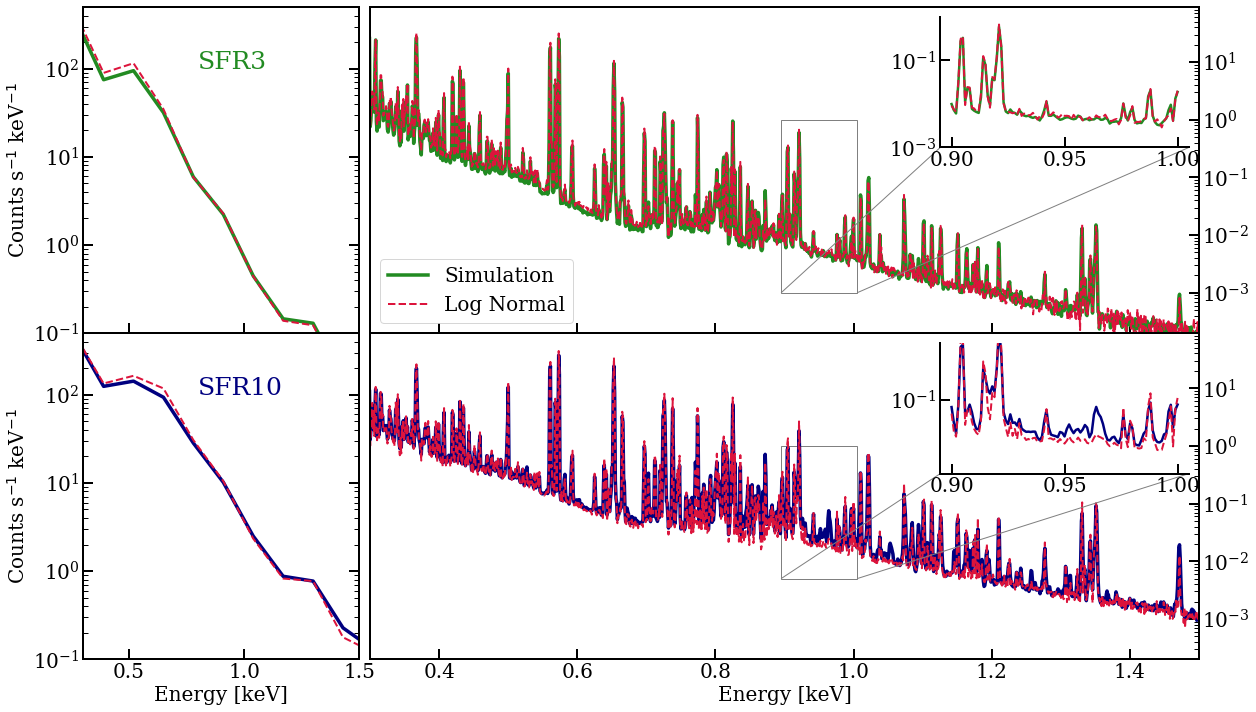

In [11]:
# base    = "/home/aditiv/CGM/Pyxsim//PlotsForPaper/PlotSpectra/"
base    = "/mnt/lustre/ast2/astadit/CGM/Pyxsim//PlotsForPaper/PlotSpectra/"
# base    = "/mnt/lustre/ast2/astadit/CGM/Pyxsim/Spectra/"

from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
matplotlib.rc("font", size=20, family="serif")
plt.rcParams['axes.linewidth']  = 2
plt.rcParams['lines.linewidth'] = 2

label   = ['SFR3', 'SFR10']


f, ax = plt.subplots(2, 2, figsize=(20,12), \
                     gridspec_kw = {'wspace':0.02, 'hspace':0, 'width_ratios':[1, 3]})

for i in range(2):
#     f, ax = plt.subplots(1, 1, figsize=(200,40), \
#                      gridspec_kw = {'wspace':0, 'hspace':0})
    plt.setp(ax,'yscale','log') 
    plt.setp(ax,'xlim',(0.3,2.0))
    
    ax[i,0].plot(eLR,simLR[i,:]/eLR,'-', lw=3.5, color = color[i])
    ax[i,0].plot(eLR,lnLR1[i,:]/eLR,'--', color = 'crimson')
    
    
    
    ax[i,1].plot(eHR,simHR[i,:]/eHR,'-', lw=3.5, color = color[i], label = 'Simulation')
    ax[i,1].plot(eHR,lnHR1[i,:]/eHR,'--', color = 'crimson', label = 'Log Normal')
    
    
    ax[i,0].text(0.8, 100.,label[i], color=color[i], fontsize=25)
    ax[i, 1].tick_params('y', which='both', right=True, labelleft=False)
    ax[i, 0].tick_params('y', which='both', right=True)
    ax[0,i].tick_params('x', which='both', labelbottom=False,bottom=True)
    ax[i,1].tick_params('y', which='both', labelleft=False,labelright=True, right=True, left=False)
    
    subset = (eHR>=0.9) & (eHR<=1.0)
    ax2  = inset_axes(ax[i,1], width="30%", height="40%", loc=1)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    mark_inset(ax[i,1], ax2, loc1=3, loc2=4, fc="none", ec='0.5')
    ax2.plot(eHR[subset], simHR[i,subset]/eHR[subset], '-', lw=2.5, color= color[i])
    ax2.plot(eHR[subset], lnHR1[i,subset]/eHR[subset], '--', color = 'crimson')
    ax2.set_yscale('log')
   
    
    ax2.set_ylim(1.e-3, 1.)
    if(i==1): ax2.set_ylim(5.e-3, 1.)
    ax2.set_xticks((0.9, 0.95, 1.0))
    if(i):plt.setp(ax,'ylim',(1.e-2,5.e2)) 

    plt.tight_layout()    
plt.setp(ax, 'xlim', (0.3,1.5))    
plt.setp(ax[:,0],'ylim',(1.e-1,5.e2)) 
plt.setp(ax[:,1],'ylim',(2.e-4,9.e1)) 
plt.setp(ax[1,:],'xlabel','Energy [keV]')
plt.setp(ax[:,0],'ylabel',r'Counts s$^{-1}$ keV$^{-1}$')

ax[0,1].legend(loc='lower left')
plt.savefig(base  + 'spectrum_ln.pdf', bbox_inches='tight',dpi=160)    